# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [22]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [14]:
(app_train['DAYS_BIRTH']/365).sort_values().value_counts()

37.668493    43
36.934247    42
27.452055    41
49.994521    41
43.208219    40
28.197260    40
36.336986    39
39.438356    39
31.956164    39
39.087671    39
36.931507    38
40.523288    38
38.057534    38
37.216438    38
37.353425    38
41.210959    38
42.643836    38
37.775342    38
41.227397    37
40.794521    37
42.328767    37
39.112329    37
42.638356    37
45.726027    37
54.997260    37
44.539726    37
35.084932    37
30.432877    37
27.769863    37
40.457534    37
             ..
21.408219     1
68.460274     1
68.810959     1
66.652055     1
68.665753     1
68.991781     1
67.939726     1
68.975342     1
68.115068     1
68.849315     1
21.021918     1
68.783562     1
68.273973     1
68.863014     1
68.569863     1
68.232877     1
68.539726     1
68.580822     1
68.909589     1
68.660274     1
21.512329     1
21.484932     1
68.693151     1
68.597260     1
68.131507     1
68.942466     1
67.438356     1
68.997260     1
67.202740     1
68.643836     1
Name: DAYS_BIRTH, Length

#### 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化

In [17]:
app_train["DAYS_BIRTH_IN_YEAR"] = app_train['DAYS_BIRTH']/365

In [26]:
app_train["DAYS_BIRTH_INTERVAL"] = pd.cut(app_train["DAYS_BIRTH_IN_YEAR"], 5)
app_train["DAYS_BIRTH_INTERVAL"].value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: DAYS_BIRTH_INTERVAL, dtype: int64

#### 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

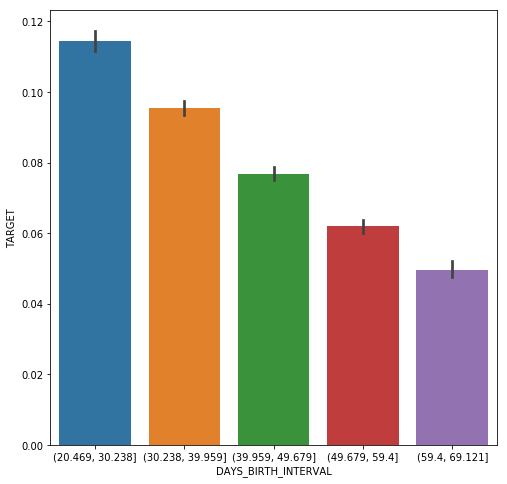

In [27]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
sns.barplot(app_train["DAYS_BIRTH_INTERVAL"], app_train['TARGET'])